In [3]:
library('biom')
library('vegan')
library('DESeq2')

library(ggbiplot)
library(ggplot2)
library(RColorBrewer)
library(stringr)
library(reshape2)
library(phyloseq)
suppressMessages(library(vegan))
suppressMessages(library(DESeq2))
suppressMessages(library(gplots))
options(width=110)
library(ggvegan)



## 1.  weighted unifrac PCoA

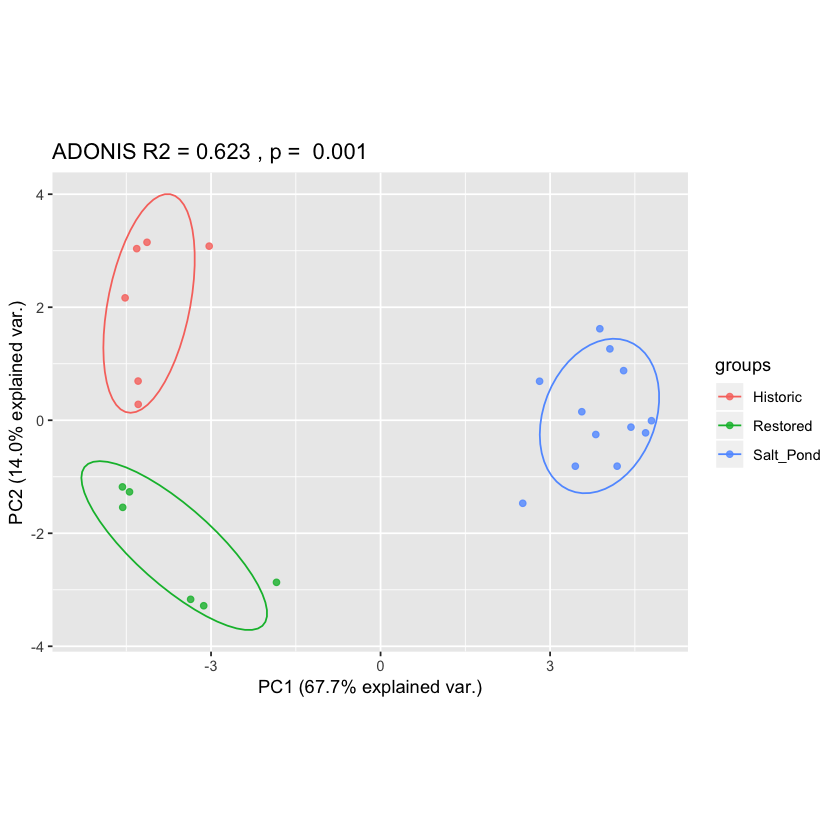

In [23]:
# 菌群数据实战
# 读入实验设计
design = read.table("/Users/jzz0026/Google_superjohnlove/jupyter/Salt_pond_v2/itag_analysis/map2.txt", header=F, row.names= 1, sep="\t") 

# 读取OTU表
otu_table = read.delim("/Users/jzz0026/Google_superjohnlove/jupyter/Salt_pond_v2/itag_analysis/itag_analysis_v2/beta/weighted_unifrac_Salt_pond_16S_otu.tax.filtered.txt", row.names= 1,  header=T, sep="\t")

# 过滤数据并排序
idx = rownames(design) %in% colnames(otu_table) 
sub_design = design[idx,]
count = otu_table[rownames(sub_design), rownames(sub_design)]

# 基于OTU表PCA分析
otu.pca <- prcomp(t(count), scale. = TRUE)

# R2 ADONIS
adonis_r <- adonis(count  ~ sub_design$V4, permutations=999)
R2 <- round(adonis_r$aov.tab$R2[1], digits=3)


# 绘制PCA图，并按组添加椭圆
ggbiplot(otu.pca, obs.scale = 1, var.scale = 1,
         groups = sub_design$V4, ellipse = TRUE,var.axes = F,alpha = 0.8) + ggtitle(paste("ADONIS R2 =", R2, ", p = ",adonis_r$aov.tab$Pr[1]))


#colnames(OTU_d)
#sub_design$V4
#otu.pca

In [18]:
count

,R2A_A_D1,R2A_A_D2,R2A_B_D1,R2A_B_D2,R2A_C_D1,R2A_C_D2,SF2_A_D1,SF2_A_D2,SF2_B_D1,SF2_B_D2,⋯,R1_B_D1,R1_B_D2,R1_C_D1,R1_C_D2,R2_A_D1,R2_A_D2,R2_B_D1,R2_B_D2,R2_C_D1,R2_C_D2
R2A_A_D1,0.0000000,0.2502813,0.2276263,0.4140415,0.3361318,0.4256934,0.4112870,0.3802405,0.49507421,0.48318733,⋯,0.5505492,0.5069011,0.5701481,0.5599093,0.6075519,0.6153632,0.5338262,0.5663427,0.5354339,0.5339865
R2A_A_D2,0.2502813,0.0000000,0.1470873,0.3655916,0.1906276,0.3730733,0.3971485,0.3728735,0.48253774,0.47091715,⋯,0.6109274,0.5611227,0.6302390,0.6007700,0.6074777,0.6149194,0.5926872,0.5666917,0.5936952,0.5745522
R2A_B_D1,0.2276263,0.1470873,0.0000000,0.3769651,0.2204488,0.3836191,0.3870106,0.3609430,0.46756884,0.45459712,⋯,0.6192196,0.5747459,0.6462688,0.6146977,0.6186923,0.6163246,0.5992410,0.5641974,0.6007397,0.5864470
R2A_B_D2,0.4140415,0.3655916,0.3769651,0.0000000,0.3093993,0.2689184,0.3309537,0.2997922,0.36234025,0.35284881,⋯,0.6043647,0.5669778,0.6308653,0.6255904,0.5961513,0.5687795,0.5760976,0.5697978,0.5621822,0.5629842
R2A_C_D1,0.3361318,0.1906276,0.2204488,0.3093993,0.0000000,0.2973438,0.3690996,0.3536361,0.42482570,0.41255960,⋯,0.6195787,0.5806056,0.6481595,0.6207432,0.6089771,0.5912200,0.5996706,0.5559542,0.6025561,0.5756158
R2A_C_D2,0.4256934,0.3730733,0.3836191,0.2689184,0.2973438,0.0000000,0.3489400,0.3230986,0.38419307,0.37489739,⋯,0.6212249,0.5761902,0.6394208,0.6311606,0.6109590,0.5872303,0.5903540,0.5774608,0.5757962,0.5820055
SF2_A_D1,0.4112870,0.3971485,0.3870106,0.3309537,0.3690996,0.3489400,0.0000000,0.1236520,0.23662403,0.21957534,⋯,0.6085273,0.5644877,0.6208383,0.6119875,0.5956122,0.5557472,0.5599146,0.5612532,0.5390717,0.5700974
SF2_A_D2,0.3802405,0.3728735,0.3609430,0.2997922,0.3536361,0.3230986,0.1236520,0.0000000,0.22163946,0.20735522,⋯,0.5790986,0.5354981,0.5943438,0.5801434,0.5766375,0.5392087,0.5445618,0.5353880,0.5279901,0.5445804
SF2_B_D1,0.4950742,0.4825377,0.4675688,0.3623402,0.4248257,0.3841931,0.2366240,0.2216395,0.00000000,0.03377293,⋯,0.4853874,0.5755406,0.5079696,0.4958937,0.5834599,0.4301001,0.4475382,0.4451357,0.5184130,0.4976218
SF2_B_D2,0.4831873,0.4709171,0.4545971,0.3528488,0.4125596,0.3748974,0.2195753,0.2073552,0.03377293,0.00000000,⋯,0.5020825,0.5694481,0.5250049,0.5134667,0.5780645,0.4479082,0.4648773,0.4616053,0.5129298,0.4927770


In [7]:
# load biom file
OTU.biom <- read_biom("/Users/jzz0026/Google_superjohnlove/jupyter/Salt_pond_v2/itag_analysis/itag_analysis_v2/Salt_pond_16S_otu.tax.filtered.biom") #'OTU_table.biom'

# Extract data matrix (OTU counts) from biom table
OTU <- as.matrix(biom_data(OTU.biom))
otus <- t(OTU)
otus <- sweep(otus, 1, rowSums(otus),'/')

env.data <- read.csv("/Users/jzz0026/Google_superjohnlove/jupyter/Saltpond/Wyatt_C-P_CH402/Salt_pond_ALL_Meta_whh.txt", row.names = 1, fill = T, header=T, sep="\t")
rownames(env.data) = env.data$Sample
env.data2 = env.data[c("Salinity","Cl","NP_ext","CH4_pos_lin")]

##by log
env.data.log <- log1p(env.data2)##
##delete NA
env <- na.omit(env.data.log)

# find the overlapping samples
common.ids <- intersect(rownames(env), rownames(otus))

# get just the overlapping samples
otus <- otus[common.ids,]
map <- env[common.ids,]

# Keep only OTUs present in at least 50% of samples
# This is fairly aggressive but will reduce the clutter in biplots
otus <- otus[,colMeans(otus>0)>.5]


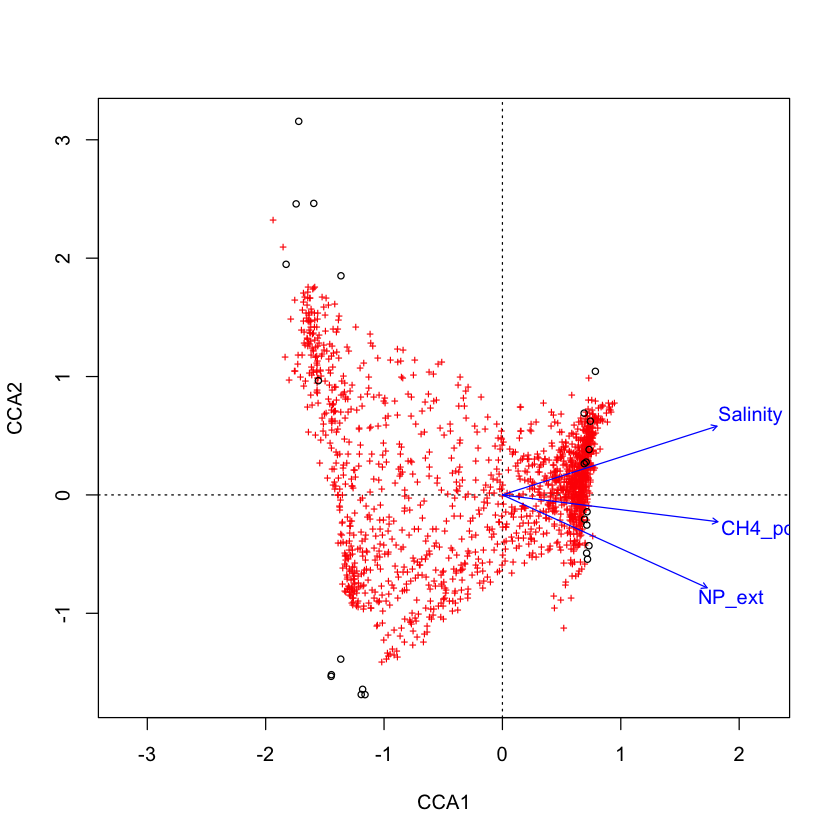

In [8]:
# run CA using vegan command
my.cca <- cca(otus ~ Salinity + NP_ext + CH4_pos_lin, data=map)
#my.cca
plot(my.cca)

In [9]:
my.cca

Call: cca(formula = otus ~ Salinity + NP_ext + CH4_pos_lin, data = map)

              Inertia Proportion Rank
Total          3.8070     1.0000     
Constrained    1.3814     0.3629    3
Unconstrained  2.4256     0.6371   20
Inertia is scaled Chi-square 

Eigenvalues for constrained axes:
  CCA1   CCA2   CCA3 
0.8518 0.3633 0.1663 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.4523 0.3801 0.2595 0.2442 0.2024 0.1481 0.1304 0.1060 
(Showed only 8 of all 20 unconstrained eigenvalues)


## PCoA distance method "bray"

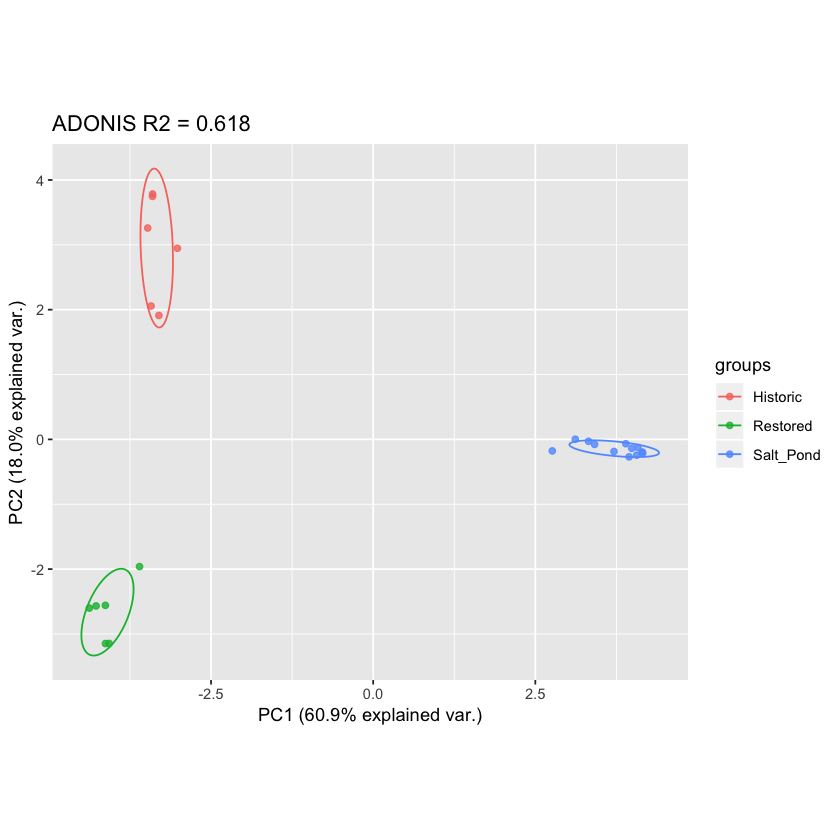

In [143]:
OTU.biom <- read_biom("/Users/jzz0026/Google_superjohnlove/jupyter/Salt_pond_v2/itag_analysis/itag_analysis_v2/Salt_pond_16S_otu.tax.filtered.biom") #'OTU_table.biom'

# Extract data matrix (OTU counts) from biom table
OTU <- as.matrix(biom_data(OTU.biom))
    
# transpose so that rows are samples and columns are genera
OTU <- t(OTU)
OTU_d <- vegdist(OTU, method="bray", diag=TRUE, upper=TRUE)
OTU_d <- as.matrix(OTU_d)
OTU_d <- OTU_d[rownames(sub_design), rownames(sub_design)]

# 基于OTU表PCA分析
otu.pca <- prcomp(OTU_d, scale. = TRUE)


# R2 ADONIS
adonis_r <- adonis(OTU_d  ~ sub_design$V4, permutations=999, method="bray")
R2 <- round(adonis_r$aov.tab$R2[1], digits=3)

# 绘制PCA图，并按组添加椭圆
ggbiplot(otu.pca, obs.scale = 1, var.scale = 1,
         groups = sub_design$V4, ellipse = TRUE,var.axes = F,alpha = 0.8) + ggtitle(paste("ADONIS R2 =", R2))
#rownames(OTU_d)
#sub_design$V4


## 2.  Unweighted unifrac PCoA

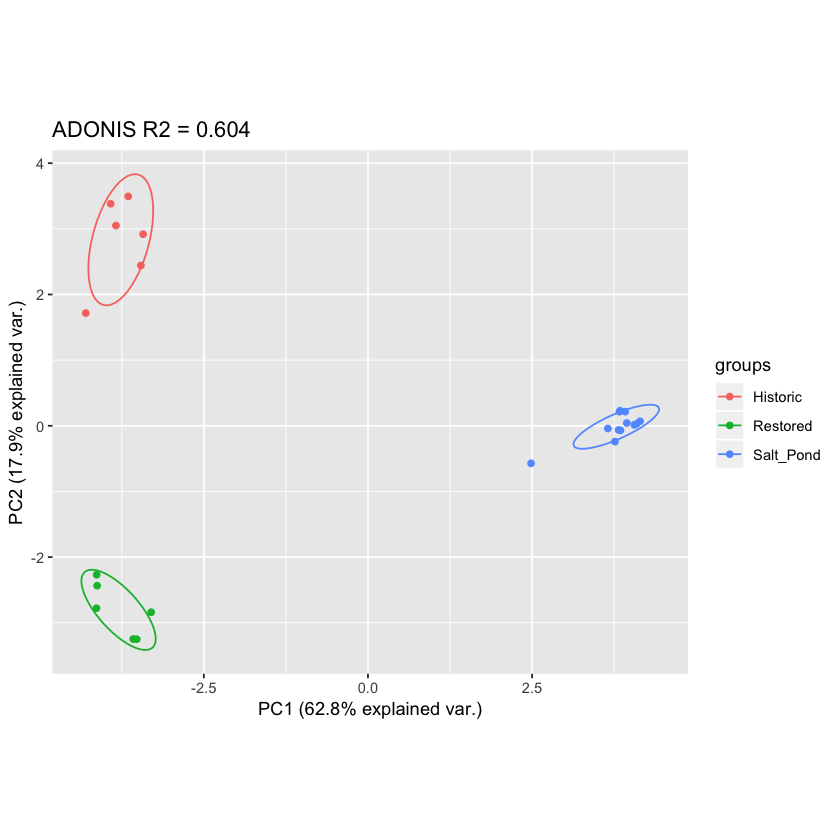

In [147]:
# 菌群数据实战
# 读入实验设计
design = read.table("/Users/jzz0026/Google_superjohnlove/jupyter/Salt_pond_v2/itag_analysis/map2.txt", header=F, row.names= 1, sep="\t") 

# 读取OTU表
otu_table = read.delim("/Users/jzz0026/Google_superjohnlove/jupyter/Salt_pond_v2/itag_analysis/itag_analysis_v2/beta/unweighted_unifrac_Salt_pond_16S_otu.tax.filtered.txt", row.names= 1,  header=T, sep="\t")

# 过滤数据并排序
idx = rownames(design) %in% colnames(otu_table) 
sub_design = design[idx,]
count = otu_table[rownames(sub_design), rownames(sub_design)]

# 基于OTU表PCA分析
otu.pca <- prcomp(t(count), scale. = TRUE)

# R2 ADONIS
adonis_r <- adonis(count  ~ sub_design$V4, permutations=999, method="bray")
R2 <- round(adonis_r$aov.tab$R2[1], digits=3)

# 绘制PCA图，并按组添加椭圆
ggbiplot(otu.pca, obs.scale = 1, var.scale = 1,
         groups = sub_design$V4, ellipse = TRUE,var.axes = F) + ggtitle(paste("ADONIS R2 =", R2))